In [149]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model


# Emotion Recognition

In [155]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('D:/Data_Science/computer_vision/opencv_cascades/haarcascade_frontalface_default.xml')

#Load model
model = load_model("./model_v6_23.hdf5")

#Model labels
class_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

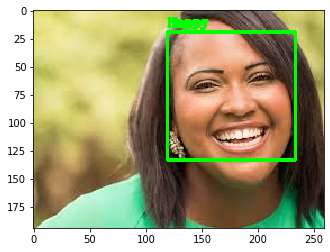

In [156]:
image = cv2.imread('./s2.jpg')
gray = cv2.cvtColor(np.asarray(image), cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    image = cv2.rectangle(np.asarray(image), (x, y), (x+w, y+h), (0, 255, 0), 2)
    current_face = cv2.cvtColor(cv2.resize(image[y:y+h, x:x+w], (48, 48)) , cv2.COLOR_BGR2GRAY)
    current_face = np.expand_dims(np.expand_dims(current_face,axis = 2),axis = 0)
    predicted_class = np.argmax(model.predict(current_face))
    emotion = class_labels[predicted_class]
    cv2.putText(image,emotion,(x, y-5),cv2.FONT_HERSHEY_COMPLEX,0.35,(0, 255, 0),2)
plt.imshow(cv2.cvtColor(image ,  cv2.COLOR_BGR2RGB ))

# Number Plate Recognition

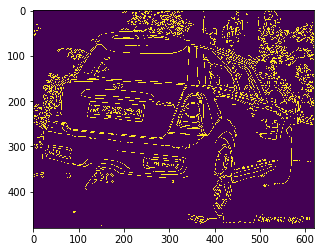

In [192]:
image = cv2.imread('./car1.jpg')
image = cv2.resize(image, (620,480) )
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grey scale
gray = cv2.bilateralFilter(gray, 20, 20, 20)
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection
plt.imshow(edged)